# CS110 Fall 2019 : Final Project
## LBA: A day in life of a Minervan Part 2

## Part 1: Task Scheduler with non-overlapping activities

This is an object-oriented, dynamic programming implementation of a Task scheduler. This algorithm uses the start and end times to and find optimal schedules, and it also uses the name of the task to give us a comprehensive result that lists our tasks in order for the optimal schedule. Below you can see a table displaying a list of activities and its start and end times. It also displays the constraints coloumn that, in my view, is very innovative and close to reality. This constraint table makes a task unuseable (by changing its benefit value) if a certain task is taking place and they cannot happen at the same time. For example, as you can see in the table there is an activity Sleep which has a benefit of 50. There is another activity Stay away and Work with benefit as 30 and constraint as sleep. These two activities cannot happen at the same time and the one that yields the most benefit will be selected by our task scheduler. We will perform an experiment on it later on to prove the optimality of our scheduler

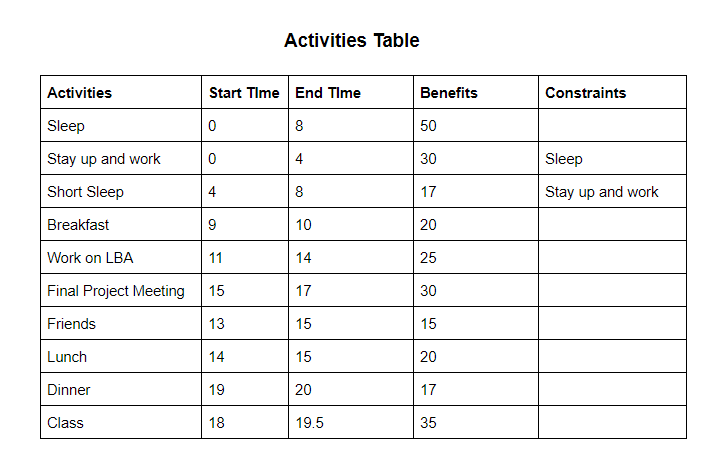

In [1]:
from IPython.display import Image
Image("Capture.png")

In [2]:
class task: 
    def __init__(self, name, start, end, task_benefit, Taskss= None, constraint= None): 
        self.name = name
        self.start  = start #Start time
        self.end = end #End Time
        self.task_benefit  = task_benefit
        self.Taskss = Taskss #This is for the activities, we will use it later on
        self.constraint = constraint
    '''
    - Initializing the object with these 
    characteristics.

    - I replace the printing of the object to 
    printing this sentence below.

    - I have gettask_benefit function which I give
    actual mechanism to for MClass.
    '''
    def __repr__(self):
        return f'{self.name} | Time:{self.start} --> {self.end}| benefit of task:{self.task_benefit}'
    def gettask_benefit(self, *args):
        return self.task_benefit

In [3]:
class MClass(task):
    def getBenefit(self,*args):
        for task in args:
            if task.name == self.constraint:
                return self.benefit
        self.benefit = -1
        return self.benefit

In [4]:
class schedule:
    '''
    Using this class helped me keep everything 
    organized, also allowing for easier analysis 
    of bugs as I wored through.
    '''
    def __init__(self,tasks):
        self.tasks = tasks
    def search(self, tasks, begin): 
        l = 0
        h = begin - 1
        while l <= h:
            m = (l + h) // 2
            if self.tasks[m].end <= self.tasks[begin].start: 
                '''
                if our middle task has end time 
                that is less than the first task's
                start time, we go to the next if 
                statement that says: 
                if the task above the middle task's
                end time is less than the first
                task's start time, set low to equal 
                that value and repeat.
                If not, then we simply return m
                Basically, this function is checking 
                previous tasks to find overlaps
                '''
                if self.tasks[m + 1].end <= self.tasks[begin].start: 
                    l = m + 1
                else: 
                    return m 
            else:
                h = m - 1
                return -1
    def schedule_it(self):
        return self._schedule_it()
    def optimal_task_benefit_nc(self):
        '''
        - This function was the first step in my 
        process for finding
        the optimal task_benefit of a list of tasks.
        '''
        self.tasks = sorted(self.tasks, key = lambda c: c.end)
        num_tasks = len(self.tasks)
        day1 = [None for _ in range(num_tasks)]
        day1[0] = self.tasks[0].task_benefit
        for a in range(1,num_tasks):
            cur1_task_benefit = self.tasks[a].task_benefit
            results = self.search(self.tasks, a)
            if results != -1: 
                cur1_task_benefit += day1[results]
            day1[a] = max(cur1_task_benefit, day1[a - 1])
            opt1 = max(day1)
            return(opt1)
    def _schedule_it(self):
        self.tasks = sorted(self.tasks, key = lambda c: c.end)
        num_tasks = len(self.tasks)
        day = [[] for _ in range(num_tasks)]
        day[0].append(self.tasks[0])
        for a in range(1,num_tasks):
            cur_task_benefit = self.tasks[a].task_benefit
            results = self.search(self.tasks, a)
            if results != -1: 
                cur_task_benefit += sum([el.gettask_benefit(*day[results]) for el in day[results]])
                for r in day[results]:
                    day[a].append(r)
            if cur_task_benefit > sum([el.gettask_benefit(*day[a-1]) for el in day[a-1]]):
                day[a].append(self.tasks[a]) 
            else:
                day[a] = day[a - 1]
        '''
        This is the main method used to find the 
        optimal schedule. In this method, we call
        on both the search and gettask_benefit methods 
        to help find the answer. This is an example
        of top-down memoization (dynamic programming)
        because I am using subproblems to find
        the overall answer. Specifically, I am 
        calculating optimal schedules up to certain
        tasks and then using these to find optimal 
        schedules for tasks later in the day.
        
        First, I sort the tasks by end time.
        Next, I create a list to keep optimal 
        schedules of the tasks.
        For every task, I search to find any 
        overlapping tasks before the current task.
        Using the optimal nonoverlapping task 
        schedule, I add to the current task list.
        I then check the sum of the current task 
        schedule's task_benefit and compare it to
        the previous day. If greater, I keep it. 
        If not, I replace it with yesterday.
        Finally, I find the max task_benefit from any 
        schedule in the list I created iteratively.
        '''
        sums = []
        for i in range(len(day)):
            s = sum([el.gettask_benefit(*day[i]) for el in day[i]])
            sums.append(s) 
        opt = max(sums)
        ind = sums.index(opt)
        print('The optimal schedule is:')
        for x in day[ind]:
            print(x)
        return(f'The optimal task benefit is:{opt}')

In [5]:
#Creating Nodes for all the activities
Sleep = task(name = "Sleep", start = 0, end = 8, task_benefit = 50)
Up_and_work = task(name = "stay up and Work", start = 0,end=4, task_benefit = 30, constraint = 'Sleep')
Short_Sleep = task(name = "Short Sleep", start = 4,end = 8, task_benefit = 17, constraint = 'Up_and_work')
Breakfast = task(name = "Breakfast", start = 9,end = 10,  task_benefit = 20)
LBA = task(name = "Work on LBA", start = 11,end=15,  task_benefit = 25)
Final_project = task(name = "Final Project Meeting", start = 15,end=18,  task_benefit = 30)
friends_time = task(name = "Friends", start = 13,end = 15, task_benefit = 15)
Lunch = task(name = "Lunch", start = 14, end = 15  ,task_benefit = 20)
Dinner = task(name = "Dinner", start = 19,end = 20, task_benefit = 17)
Class = task(name = "Class", start = 18, end = 22, task_benefit = 35)

#Appending All the nodes to a list
tasks=[Sleep, Up_and_work, Short_Sleep, Breakfast, LBA, friends_time, Final_project, Lunch, Dinner, Class]
tasks1 = schedule(tasks)
for x in range(len(tasks)):
    print(tasks[x])
print('\n')
tasks1.schedule_it()

Sleep | Time:0 --> 8| benefit of task:50
stay up and Work | Time:0 --> 4| benefit of task:30
Short Sleep | Time:4 --> 8| benefit of task:17
Breakfast | Time:9 --> 10| benefit of task:20
Work on LBA | Time:11 --> 15| benefit of task:25
Friends | Time:13 --> 15| benefit of task:15
Final Project Meeting | Time:15 --> 18| benefit of task:30
Lunch | Time:14 --> 15| benefit of task:20
Dinner | Time:19 --> 20| benefit of task:17
Class | Time:18 --> 22| benefit of task:35


The optimal schedule is:
Sleep | Time:0 --> 8| benefit of task:50
Breakfast | Time:9 --> 10| benefit of task:20
Work on LBA | Time:11 --> 15| benefit of task:25
Final Project Meeting | Time:15 --> 18| benefit of task:30
Class | Time:18 --> 22| benefit of task:35


'The optimal task benefit is:160'

### Experiment For Optimality of the Algorithm
In the first test case, we show that Sleep from $0\to8$ is chosen because its benefit of $50$ is greater than the combined benefits of Staying up Late from $0 \to 4$ and sleeping $4 \to 8$ which is $47$. This does, however, show that our algorithm is working and that it chooses the optimal schedule. Now in the second test case we will increase in benefit of our 4 hour sleep that changes our schedule to Staying up late and working and then sleeping. This still allows us to have class and optimizes our schedule. This test demonstrates our algorithm working in multiple scenarios with changes to benefit values.

In [6]:
Sleep = task(name = "Sleep", start = 0, end = 8, task_benefit = 50)
Up_and_work = task(name = "stay up and Work", start = 0,end=4, task_benefit = 50, constraint = 'Sleep')
Short_Sleep = task(name = "Short Sleep", start = 4,end = 8, task_benefit = 17, constraint = 'Up_and_work')
Breakfast = task(name = "Breakfast", start = 9,end = 10,  task_benefit = 20)
LBA = task(name = "Work on LBA", start = 11,end=15,  task_benefit = 25)
Final_project = task(name = "Final Project Meeting", start = 15,end=18,  task_benefit = 30)
friends_time = task(name = "Friends", start = 13,end = 15, task_benefit = 15)
Lunch = task(name = "Lunch", start = 14, end = 15  ,task_benefit = 20)
Dinner = task(name = "Dinner", start = 19,end = 20, task_benefit = 17)
Class = task(name = "Class", start = 18, end = 22, task_benefit = 35)
tasks=[Sleep, Up_and_work, Short_Sleep, Breakfast, LBA, friends_time, Final_project, Lunch, Dinner, Class]
tasks1 = schedule(tasks)
for x in range(len(tasks)):
    print(tasks[x])
print('\n')
tasks1.schedule_it()

Sleep | Time:0 --> 8| benefit of task:50
stay up and Work | Time:0 --> 4| benefit of task:50
Short Sleep | Time:4 --> 8| benefit of task:17
Breakfast | Time:9 --> 10| benefit of task:20
Work on LBA | Time:11 --> 15| benefit of task:25
Friends | Time:13 --> 15| benefit of task:15
Final Project Meeting | Time:15 --> 18| benefit of task:30
Lunch | Time:14 --> 15| benefit of task:20
Dinner | Time:19 --> 20| benefit of task:17
Class | Time:18 --> 22| benefit of task:35


The optimal schedule is:
stay up and Work | Time:0 --> 4| benefit of task:50
Short Sleep | Time:4 --> 8| benefit of task:17
Breakfast | Time:9 --> 10| benefit of task:20
Work on LBA | Time:11 --> 15| benefit of task:25
Final Project Meeting | Time:15 --> 18| benefit of task:30
Class | Time:18 --> 22| benefit of task:35


'The optimal task benefit is:177'

### Explanation of the Algorithm
In this solution I managed to include many aspects that i learned throughout the course of our classes. I used classes in my code that helped this scheduler work correctly and quickly while staying organized. This algorithm is an example of dynamic programming where i used memoization for this problem. I used dynamic programming as we know that each subproblem will have the same structure - a list of schedules in order with optimal summed benefit. We also know that the optimal solution for a given subproblem will contribute to the optimal solution for the next level if the tasks do not overlap. Because of this, our application is successful in determining the optimal schedule. We store optimal solutions for each level (subproblems) and then add if no overlap and we increase benefit. If not, we simply pick between our solutions to find the optimal solution.


### Assumptions
Some assumptions that we have that may need to be re-assesed for a true, realistic solution:

1. Not doing something doesn't decrease benefit (or increase) of another chore. For example, sleeping only 4 hours doesn't decrease the benefit of the class I. Implementing this will make my Algorithm more realistic

2. Our hours can't shrink or stretch depending on needs. In life, there is flexibility and not everything happens on the dot. This algorithm is a #model, using a simplified version of life to understand how things work.

Extensions to solve these problems would include structural changes to the algorithm and multiple methods added. I would like to, given I have time, improve this algorithm by adding in a new method or aspect to the getBenefit method that decreases benefit given that another chore has been (or hasn't been) completed. For this, I would need to add new attributes to the object and restructure some minor aspects of my program. I attempted - and failed - this already, and there isn't enough time to keep working on, but I do think it is a very interesting addition that I would like to implement. Additionally, adding in segments or duplicates to our tasks could be helpful to solving the flexibility problem using duplicates, I could allow for more optimal solutions that could work around constraints. For example, having separate study times that would allow me to take a nap in between them and still go to class (given that studying could be a constraint for class).

### Complexity Analyses
 
In this solution First, I sort the tasks by end time. For sorting I used the python built in function. Python uses Timsort is its built in function which is a hybrid stable sorting algorithm, derived from merge sort and insertion sort, the best case time complexity of timsort is   $\Theta(n)$ where as the worst and average case complexity is $\Theta(n log n)$.

Next, I created a list to keep optimal schedules of the tasks. For every task, I searched to find any overlapping tasks before the current task. Using the optimal task benefit function, I added that task to the current task list. As this function iterates through the whole list then the time complexity of that would be proportional to the number of elements of the list. COnsidering the list has $n$ number of elements the time complexity of this part would be $\Theta(n)$.

I then check the sum of the current task schedule's benefit and compare it to the previous day. If greater, I keep it. If not, I replace it with yesterday. Finally, I find the max benefit from any schedule in the list I created iteratively. This operation also take $\Theta(n)$ time. So, the whole time complexity of this Algorithm would be:
$$\Theta(nlogn) + \Theta(n) + \Theta(n) = \Theta(n log n)+ 2\Theta(n) $$

## Part 2: Compare and Contrast with LBA Part 1

Below you san see my code for the LBA: Part 1. This had completely different approach as I used different tasks in an activity to calculate the total priority value of the activity. This Algorithm was more like a time calculator than a task scheduler as it just sorted the activities based on their priority and then calculated the total time taken for the activities to execute the following tasks. Below you can see the table of activities and the tasks.

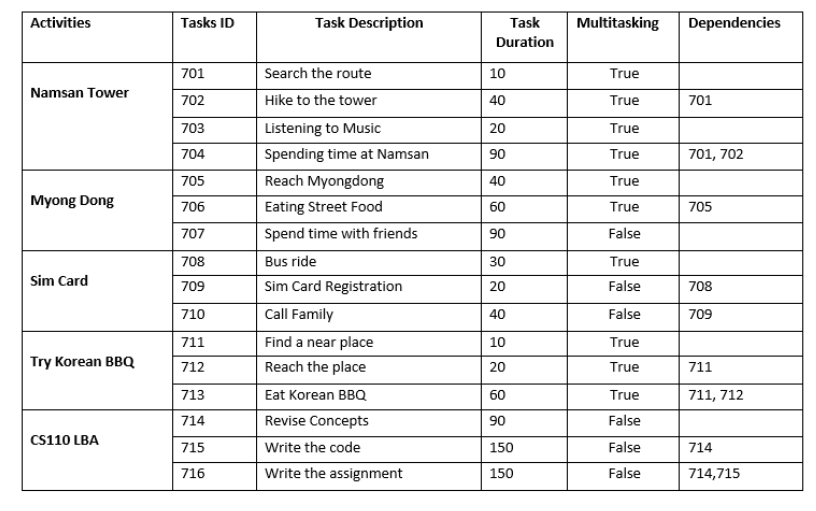

In [7]:
from IPython.display import Image
Image("Capture1.png")

In [8]:
# Defining binary tree functions

def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2  #            returns the array index of its parent


# Defining the Python class MaxHeapq to implement a max heap data structure.
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    # Class initialization method.
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0

    # This method returns the highest key in the priority queue. 
    def maxk(self):              
        return self.heap[0]     
    
    # This method implements the INSERT key into a priority queue operation
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    # This method implements the INCREASE_KEY operation, which modifies the value of a key
    # in the max priority queue with a higher value. 
    def increase_key(self, i, key): 
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)] < self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # This method implements the MAX_HEAPIFY operation for the max priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

#Defining a class for the taskes that could take all the attributes of the tasks 
class Node:
    def __init__(self, name, ID=None, tt = None, multitasking= False, dependencies =list , priority=0):
        self.name = name
        self.ID = ID #This will be the unique identity of the task
        self.tasktime = tt #time required to do the task, default: None
        self.multitasking = multitasking
        self.priority = priority # The initial priority of all the tasks is set to zero
        self.dependencies= dependencies


#This function creates a dictionary where the task ID is its key and all the rest attributes are the values
#This functions make it easier to call the tasks from its unique ID 
def fill_table(taskslists):
    for i in taskslists:
        tasktable[str(i.ID)]=i

#This function applies different conditions and computes the priorities of the tasks based on their
#dependencies and ability of multitasking
def scheduler(tasktable):
        for i in tasktable:
            if len(tasktable[i].dependencies) == 0: #First condition if the task has no dependencies
                tasktable[i].priority += 10
            else:
                for j in tasktable[i].dependencies: #This condition increases the priority if a task has
                    j=str(j.ID)                     #Other tasks dependent on it
                    tasktable[j].priority+=5
            if tasktable[i].multitasking==False:   #This condition increased the priority based on the ability
                tasktable[i].priority+=10         # of the task to multitasking
            else:
                tasktable[i].priority-=5

#This function calculates the individual time of the activities and append them to a dictionary 
# with key values as the ID of the activities
def activity_time(activities):
    for i in activities:
        t=0
        for j in i.dependencies:
            t+=j.tasktime
        timelst.append(t)
        time[str(i.ID)]=t
        
        
#This function takes all the activities as its inputs and computes their total priorities
#It also sorts out the activities based on their priorities
def activity_priorities(activities): 
    for i in activities:
        p=0
        for j in i.dependencies:
            p+= j.priority     #Calculating total priorities in an activity
        lst.append(p)
        priorities[str(i.ID)]=p    #Appending all the values to a dictionary with key values as their ID's
    my_heap = MaxHeapq()           #Applying Heap class to get the activity of maximum priority
    for key in lst:                # Also sorts the priorities of activities in decending order
        my_heap.heappush(key)    
    sortedlst= my_heap.heap
    sortedlst[3],sortedlst[4]=sortedlst[4], sortedlst[3]   
    for i in sortedlst:
        for j in priorities:
            if i==priorities[j]:
                ids.append(j)

#This function takes all the tasks within activities as its inputs and sorts them out within the activities
#Based on their priorities
def calc_priorites(l): 
    before_sorting = []
    pri_dict = {}
    id_s = []
    for i in l:
        p=i.priority
        for j in i.dependencies:
            p += j.priority
        before_sorting.append(p)
        pri_dict[str(i.ID)]=p
    my_heap = MaxHeapq()
    for key in before_sorting:
        my_heap.heappush(key)
    sortedlst= my_heap.heap  
    for i in sortedlst:
        for j in pri_dict:
            if i==pri_dict[j]:
                id_s.append(j)
    print(getNames(l, id_s))


#This function Iterates throught the list of sorted tasks with their ID's and returns the 
#Specific names of the tasks
def getNames(l, id_s):
    names = []
    for i in id_s:
        for j in l:
            if j.ID==int(i):
                names.append(j.name)
    return names

#This function prints the Activities based on their decending order of priorities also calculates thier total time 
def executer():
    for i in ids:
        for j in activities:
            if j.ID==int(i):
                print(j.name)  
                print('This activity will take about', time[i], 'minutes')
    print('These activities will take total time of', sum(timelst) ,'minutes')

#This is a final finction that gives input to all the other functions and generated the final output
def final_task_schedular():
    print("You should spend the day with activities in the following order:")
    fill_table(taskslists)
    scheduler(tasktable)
    fill_table(activities)
    activity_time(activities)
    activity_priorities(activities)
    executer()
    print('------------------------------------------------------------------------------------------------------')
    print('While doing the activities in this order you can save more tive by doing the tasks in an activity in the following order')
    print(activities[4].name)
    calc_priorites(activities[4].dependencies)
    print(activities[2].name)
    calc_priorites(activities[2].dependencies)
    print(activities[1].name)
    calc_priorites(activities[1].dependencies)
    print(activities[0].name)
    calc_priorites(activities[0].dependencies)
    print(activities[3].name)
    calc_priorites(activities[3].dependencies)    

In [9]:
#Individual tasks and their Attributes
#They are clearly written on the table displayed above and Sorry For Cluttering
Namsan_route = Node(ID=701, name = "Search Namsan Route", tt = 10, multitasking= True, dependencies =[], priority = 0)
Namsan_hike = Node(ID=702,name = "Hike to Namsan Tower", tt = 40, multitasking= True, dependencies =[Namsan_route], priority = 0)
listen_music = Node(ID=703,name = "Listen to Music", tt = 20, multitasking= True, dependencies =[], priority = 0)
time_at_namsan = Node(ID=704,name = "Spending Time at Namsan", tt = 90, multitasking= True, dependencies =[Namsan_route, Namsan_hike] , priority = 0)
reach_myongdong = Node(ID=705,name = "Reach Myongdong", tt = 40, multitasking= True, dependencies =[], priority = 0)
Street_food = Node(ID=706,name = "Eat Street Food", tt = 60, multitasking= True, dependencies =[reach_myongdong] , priority = 0)
friends_time = Node(ID=707,name = "Spend Time with Friends", tt = 90, multitasking= False, dependencies =[], priority = 0)
ride_for_sim = Node(ID=708,name = "Reach Sim Shop", tt = 30, multitasking= True, dependencies =[], priority = 0)
sim_registration = Node(ID=709,name = "Sim Registration", tt = 20, multitasking= False, dependencies =[ride_for_sim] , priority = 0)
call_family = Node(ID=710,name = "Call Family", tt = 40, multitasking= False, dependencies =[sim_registration] , priority = 0)
find_bbq_place = Node(ID=711,name = "Search Korean BBQ place", tt = 10, multitasking= True, dependencies =[], priority = 0)
reach_bbq_place = Node(ID=712,name = "Reach Korean BBQ Place", tt = 20,multitasking= True, dependencies =[find_bbq_place] , priority = 0)
eat_kbbq = Node(ID=713,name = "Eat Korean BBQ", tt = 60, multitasking= True, dependencies =[find_bbq_place,reach_bbq_place] , priority = 0)
revise_concepts = Node(ID=714,name = "Revise CS concepts", tt = 90, multitasking= False, dependencies =[] , priority = 0)
write_code = Node(ID=715,name = "Write code for LBA", tt = 150, multitasking= False, dependencies =[revise_concepts] , priority = 0)
write_cs_lba = Node(ID=716,name = "Write CS110 LBA", tt = 150, multitasking= False, dependencies =[revise_concepts,write_code], priority = 0)

#Parent List of all the tasks
taskslists = [Namsan_route, Namsan_hike, listen_music, time_at_namsan, reach_myongdong, Street_food, 
              friends_time, ride_for_sim, sim_registration, call_family, find_bbq_place, reach_bbq_place, 
              eat_kbbq, revise_concepts, write_code, write_cs_lba]


#Activities And tasks within the activities
Namsan_hike_activity=Node(ID=1,name="Namsan Hike Activity",dependencies=[Namsan_route,Namsan_hike,listen_music,time_at_namsan])
MyongDong_activity=Node(ID=2, name='MyongDong Street Food Activity',dependencies=[reach_myongdong, Street_food,friends_time])
Sim_card_activity=Node(ID=3, name='Sim Card Activity',dependencies=[ride_for_sim, sim_registration,call_family])
Korean_bbq_activity=Node(ID=4, name='Korean BBQ Activity',dependencies=[find_bbq_place,reach_bbq_place,eat_kbbq])
CS110_lba_activity=Node(ID=5,name='CS110 LBA Activity',dependencies=[revise_concepts,write_code,write_cs_lba])

#parent list of all acticities
activities=[Namsan_hike_activity,MyongDong_activity,Sim_card_activity,
            Korean_bbq_activity,CS110_lba_activity]

#Empty dictionaries, lists, and final execution of the scheduler to generate the output
time={}
timelst=[]
lst=[]
ids=[]
tasktable={}
priorities={}
final_task_schedular()

You should spend the day with activities in the following order:
CS110 LBA Activity
This activity will take about 390 minutes
Sim Card Activity
This activity will take about 90 minutes
MyongDong Street Food Activity
This activity will take about 190 minutes
Namsan Hike Activity
This activity will take about 160 minutes
Korean BBQ Activity
This activity will take about 90 minutes
These activities will take total time of 920 minutes
------------------------------------------------------------------------------------------------------
While doing the activities in this order you can save more tive by doing the tasks in an activity in the following order
CS110 LBA Activity
['Write CS110 LBA', 'Revise CS concepts', 'Write code for LBA']
Sim Card Activity
['Sim Registration', 'Call Family', 'Reach Sim Shop', 'Sim Registration', 'Call Family']
MyongDong Street Food Activity
['Spend Time with Friends', 'Eat Street Food', 'Reach Myongdong']
Namsan Hike Activity
['Search Namsan Route', 'Hike to 

### Explanation of the Algorithm:

Since we are using a binary heap data structure, it is very simple and efficient as we only need two operations in this data structure: Inserting an element and removing the most significant (In my case the one with highest priority) item form the max heap. And since we have already sorted the tasks within the activities and our priority values count for both whether the task is multitasking or not we only needed to build a priority queue from the activities where the priority value for the activities would be the summed priority value of the tasks in that activity. The Priority queues in my Algorithm works with these properties:
1. A task with higher priority is dequeued before the task with relatively lower priority
2. If two elements have the same priority then they are executed according to their order in the queue
3. This whole process works until there are no elements in the queue.


### Flaws in the Algorithm

#### 1. Non Generalizeable:
This scheduler will not work for generic task tables which means that the outputs generated by this Algorithm will only work for this test case which is used in the Algotithm. This is highly inconvinient in terms of testing since we wont be able to check whether this scheduler works for other test cases or not.

#### 2. Flawed Assumptions:
Some of the premises which are discussed in the Part 3 does not hold true in real life and hence are mere assumptions. For example, most of the time people cannot execute more than one tasks at the same time (depending on the nature of the task) and sometimes most of the people can work through different tasks in different activities in order to optimize the their time.
#### 3.  Doesnot really take into account overlapping
This algorithm only increases or decreases the priority of a task based on the multitasking attribute of the task. Now this doesnot really takes into account the actual overlapping of the tasks as we studied in the knapsack problem. The real overlapping is when time is taken into account and different tasks overlap on the same time zone (as we did in the first question) which doesnot happen in this Algorithm

###  Complexity Analyses


#### Insertion Function:

Now, As we know that the number of operations executed when calling insertion functions depends on the number of levels the new element is rising to satisfy the max heap property. Implying the average case scenario insertion function has a time complexity of $\Theta(1)$, while the worst cas scenario has a time complexity of $\Theta(log n)$. These complexities are discussed below:

#### Analyses of Insertion function:

Assuming the worst case scenario where the element inserted is the max and time complexity is $\Theta(log n)$ as we have to move this element from the leaves (bottom of the tree) to the roots or somewhere near that. The height of the binary tree is $log2$ in an $n$ element's list. For instance we need to divide the elements into two parts until we reach the base case of 1 iteam without any more children given by the equation $\frac{n}{2^k}$= $1 $. In this scenario $k$ is $log2n$. This means that the number of comaprisons and swaps we need in order to move the element to its right position (to the root in this scenario since the element id the maximum) is almost $\Theta(log2n)$.

For the average case of the same insertion function discussed above we can use the average distribution of the elements within a heap where all the elements have a probability of $0.5(1/2)$ of being at a certain height at the tree. Mostly it requires only one comparison and no swaps but at the same time it has a probability of $(0.25)(1/4)$ of being at height $h-1$ which requires $2$ comparisons and one swap and this probability continues on. So, now if we use this knowledge we get the average number of expected steps taken that will be equal to $1*1/2 + 2*1/4 + 3*1/8 ...$ using the summation formula on this expression we get the average complexity of $\Theta(1)$ in this average case scenario.

#### Analyses of Deletion function: 

As we know that the deletion function has the time complexity of $\Theta(log2n)$ for both average case scenario and the worst case scenario. It works similarly because in the worst case the element is deleted form the root and then we heapify to satisfy the heap property. After this deletion we swap one of the child nodes of the deleted nodes with the new node that was empty after the deletion and this swap goes all the way down to the last child node at the tree. So this swaping requires us to go all the way down to the last child of the tree for which we already made calculations above so it means the dept would be $\Theta(log2n)$ .


All of the operations mentioned above are either constant or a lograthmic value, This shows that this Algorithm saves alot of time and is efficient in terms of time complexity. This is the main reason why priority queues based on heaps are implemented in this Algorithm. However, my Algorithm other than the heaps and priority queues is very inefficient since it goes through all the values again and again within the list of tasks, and because i used nested for loops again and again making the overall time complexity of my Algorithm much higher. Although this doesnot seem to effect my algorithm as the input size is much smaller but had there been an input of 1000 elements. This Algorithm would have taken forever to generate the output and will prove to be highly inefficient.

## Part 3: Improved Task Scheduler

As discussed above both of the Algorithms discussed have some limitataions and assumptions. The first one is closely related to the reality but it doesnot take into account the overlapping of the activities. This task scheduler just goes through the list of the Activities' start and end times and prints out the best combimation of the activities that reveal the maximum benefit. The second algorithm is far more from reality as it doesnot take into account the timings of the activities. It just calculates the priorities of the activities based on their multitasking ability and the dependendencies and then sorts the activities using max heap. The function below is the improves version of both of these task schedulers. It not only take into the times of the activities but also calculates the total benefits of the activities from a number of tasks that overlap with each other. This progam is a combination of the dynamic programming concept as well as the greedy algorithms. This Algorithm takes in the list of activities as its Input. Each element in the list of activities is a list of tasks with a certain benefit value and can be performed in the specific amount of time that was alloted to the Activities in the Question 1. Now this program will iterate throught the list of tasks in an activity and will then calculate the optimal benefit value from the tasks that will eventually be the total benefit of the activity. Note that we used greedy algorithm in this part because the tasks can overlap each other so even a fraction of the task can add up to the total value of benefit obtained from the activity. Once the optimal benefit value of all the activities is calculated, we will then use the dynamic programming algorithm that we wrote in Question 1 to find out the optimal benefit of all the activities. Note that here we are using dynamic programming as the activities donot overlap with each other. Below you can see the table of activities which as same that we used in the Question 1. The only addition is that now the activities doesnot have a defined benefit value. Rather it calculates this value by taking the optimal  benefit value from the combination of tasks. 

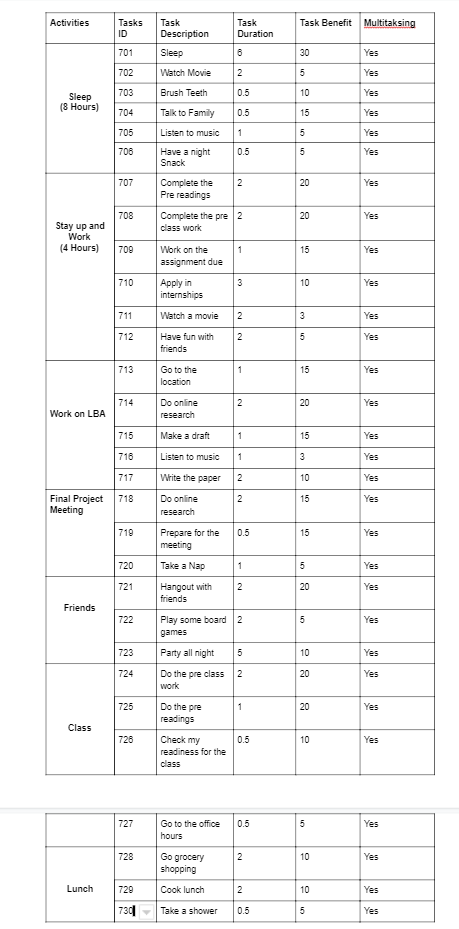

In [10]:
from IPython.display import Image
Image("Capture2.png")

Below is the python implementation of the table shown above. The class contains all the attributes that are required for each task and are shown in different coloumns of the table. Then every task is given a certain benefit value which you can also see in the table. After creating all these nodes, I append them into a list of activities where all these tasks are in the $'Taskss'$ attribute of the class

### Python Implementation of the Above Table

In [11]:
class Task:
    def __init__(self,task_time,task_benefit, name=None, ID=None,  multitasking= True, Taskss =list):
        self.name = name
        self.ID = ID #This will be the unique identity of the task
        self.task_time = task_time #time required to do the task, default: None
        self.multitasking = multitasking
        self.task_benefit= task_benefit
        self.Taskss= Taskss
        self.cost = task_benefit // task_time #Cost of a task

#Tasks in Activity 1

Sleep = Task(ID=701, name = "Sleep", task_time = 6, multitasking= True,  task_benefit = 30)
Watch_movie = Task(ID=702,name = "Watch a movie", task_time = 2, multitasking= True, task_benefit = 5)
Brush_teeth = Task(ID=703,name = "Brush Teeth", task_time = 0.5, multitasking= True, task_benefit = 10)
Family = Task(ID=704,name = "Talk to Family", task_time = 0.5, multitasking= True,  task_benefit = 15)
listen_music = Task(ID=705,name = "Listen to Music", task_time = 1, multitasking= True,  task_benefit = 5)
Night_snack = Task(ID=706,name = "Eat Night Snack", task_time = 0.5, multitasking= True,  task_benefit = 5)


# Tasks in Activity 2
Pre_readings = Task(ID=707,name = "Pre Readings", task_time = 2, multitasking= True, task_benefit = 20)
Pre_work = Task(ID=708,name = "Pre Work", task_time = 2, multitasking= True, task_benefit = 20)
Assignment = Task(ID=709,name = "Work on Assignment", task_time = 1, multitasking= True, task_benefit = 15)
Internship = Task(ID=710,name = "Apply in Internships", task_time = 3, multitasking= True, task_benefit = 10)
Movie = Task(ID=711,name = "Watch a movie", task_time = 2, multitasking= True,  task_benefit = 3)
Fun = Task(ID=712,name = "Fun with Friends", task_time = 2,multitasking= True, task_benefit = 5)


#Tasks in Activity 3
Location = Task(ID=713,name = "Go to the Location", task_time = 1, multitasking= True , task_benefit = 15)
Online_research = Task(ID=714,name = "Do Online Research", task_time = 2, multitasking= True,  task_benefit = 20)
Draft = Task(ID=715,name = "Write a Draft", task_time = 1, multitasking= True, task_benefit = 15)
Music = Task(ID=716,name = "Listen to Music", task_time = 1, multitasking= True,  task_benefit = 3)
write_paper = Task(ID=7017, name = "Write the Paper", task_time = 2, multitasking= True  , task_benefit = 10)




#Tasks in Activity 4
Online_research2= Task(ID=7018,name = "Hike to Namsan Tower", task_time = 2, multitasking= True,  task_benefit = 15)
Meeting = Task(ID=7019,name = "Listen to Music", task_time = 0.5, multitasking= True,  task_benefit = 15)
nap = Task(ID=720,name = "Spending Time at Namsan", task_time = 1, multitasking= True, task_benefit = 5)



# Tasks in Activity 5
Hangout_friends = Task(ID=721,name = "Hangout With Friends", task_time = 2, multitasking= True,   task_benefit = 20)
Board_Games = Task(ID=722,name = "Play Board Games", task_time = 2, multitasking= True, task_benefit = 5)
Party_time = Task(ID=723,name = "Party All Night", task_time = 5, multitasking= True, task_benefit = 10)



#Tasks in Activity 6
Prework = Task(ID=724,name = "Do Pre Class Work", task_time = 2, multitasking= True,   task_benefit = 20)
Preclass = Task(ID=725,name = "Do Pre Readings", task_time = 2,multitasking= True, task_benefit = 20)
check_rediness = Task(ID=726,name = "Check My readiness", task_time = 0.5, multitasking= True, task_benefit = 10)
Office_hours = Task(ID=727,name = "Office Hours", task_time = 0.5, multitasking= True,   task_benefit = 5)



#Tasks in Activity 7

Grocerry = Task(ID=728,name = "G0 grocery Shopping", task_time = 2, multitasking= True, task_benefit = 10)
Lunch = Task(ID=729,name = "Cook Lunch", task_time = 2, multitasking= True, task_benefit = 10)
Shower = Task(ID=730,name = "Take a Shower", task_time = 0.5, multitasking= True, task_benefit = 5)





#Activities And tasks within the activities
Sleep = task(name = "Sleep", start = 0, end = 8, task_benefit = 0, Taskss= [Sleep,Watch_movie,Brush_teeth,Family,listen_music,Night_snack])
Up_and_work = task(name = "stay up and Work", start = 0,end=4, task_benefit = 0, Taskss = [Pre_readings,Pre_work,Assignment,Internship,Movie,Fun], constraint = 'Sleep')
LBA = task(name = "Work on LBA", start = 11,end=15,  task_benefit = 0, Taskss = [Location,Online_research,Draft,Music,write_paper])
Final_project = task(name = "Final Project Meeting", start = 15,end=18,  task_benefit = 0,Taskss = [Online_research2,Meeting,nap])
friends_time = task(name = "Friends", start = 13,end = 15, task_benefit = 0,Taskss = [Hangout_friends,Board_Games,Party_time])
Class = task(name = "Class", start = 18, end = 22, task_benefit = 0,Taskss = [Prework,Preclass,check_rediness,Office_hours])
Lunch = task(name = "Lunch", start = 14, end = 15  ,task_benefit = 0, Taskss = [Grocerry,Lunch,Shower])

#Parent List of All Activities
Activities=[Sleep, Up_and_work, LBA,Final_project, friends_time, Class, Lunch]


Below is the python implementation of the Improved task scheduler that is described in the above section.

### Improved Task Scheduler

In [12]:
class Itemvalue: 
      
    """Item task_benefitvalue DataClass"""
    def __init__(self,task_time,task_benefit, name=None, ID=None,  multitasking= True, Taskss =list):
        self.name = name
        self.ID = ID #This will be the unique identity of the task
        self.task_time = task_time #time required to do the task, default: None
        self.multitasking = multitasking
        self.Taskss = Taskss # The initial priority of all the tasks is set to zero
        self.task_benefit= task_benefit
        self.cost = task_benefit // task_time #Cost of a task
    def __lt__(self, other): 
        return self.cost < other.cost 

def getMaxvalue(Activities, task_time, task_benefit, capacity): 
          
    """function to get maximum value """
    itask_benefit = [] 
    for i in Activities:
        for j in i.Taskss:
            itask_benefit.append(Itemvalue(j.task_time, j.task_benefit, j)) 
  
    # sorting items by value
    itask_benefit.sort(reverse = True) 
    totalvalue = 0
    for i in itask_benefit: 
        curtask_time = int(i.task_time) 
        curtask_benefit = int(i.task_benefit) 
        if capacity - curtask_time >= 0: #Checking of the current value is less than the total capacity
            capacity -= curtask_time 
            totalvalue += curtask_benefit 
        else: 
            fraction = capacity / curtask_time #APplying the Fraction part of the overlapping activities 
            totalvalue += curtask_benefit * fraction 
            capacity = int(capacity - (curtask_time * fraction)) 
            break
    return totalvalue



def taskmanager(Activities):
    
    """This function iterates through all the tasks
    within an activity and then calculate the optimal
    benefit value that can be obtained from the activity.
    After that it used the function that we used in the first 
    part to calculate the optimal schedule of the activities"""
    
    
    for i in Activities:
        capacity = abs(i.start-i.end)
        for j in i.Taskss:
            task_time= j.task_time
            task_benefit = j.task_benefit
            
        i.task_benefit= int(getMaxvalue(Activities,task_time, task_benefit, capacity))
    print('\n')
    tasks1 = schedule(Activities)
    for x in range(len(Activities)):
        print(Activities[x])
    print('\n')
    tasks1.schedule_it()
    
taskmanager(Activities)



Sleep | Time:0 --> 8| benefit of task:150
stay up and Work | Time:0 --> 4| benefit of task:110
Work on LBA | Time:11 --> 15| benefit of task:110
Final Project Meeting | Time:15 --> 18| benefit of task:100
Friends | Time:13 --> 15| benefit of task:80
Class | Time:18 --> 22| benefit of task:110
Lunch | Time:14 --> 15| benefit of task:65


The optimal schedule is:
Sleep | Time:0 --> 8| benefit of task:150
Work on LBA | Time:11 --> 15| benefit of task:110
Final Project Meeting | Time:15 --> 18| benefit of task:100
Class | Time:18 --> 22| benefit of task:110


### Complexity Analyses
 
In this Solution we first use a greedy Algorithm to calculate the cost of the task. We calculate it by dividing the total benefit of the task by the total time taken to acquire that benefit. We then append that cost to a list and then sort that list. As the built in python function is used to Sort the list and its complexity is already discussed in the above part of the assignment it takes $\Theta(log n)$ average time to sort the list, where $n$ is the number of elements in the list. As there are no major calculations apart from the sorting of the list then the coomplexity of the whole function can be represent as $\Theta(log n)$

In the second part we iterated this greedy Algorithm over all the the activities and the tasks of the activities to calculate the total optimal benefit of the activity. And to find the optimal schedule from this updated benefits of the activities, I once again used the Algorithm we created in the first question. The total time complexity of that Algorithm, as calculated above is, $\Theta(nlogn) + \Theta(n) + \Theta(n) = \Theta(n log n)+ 2\Theta(n) $

So the total time complexity this Improved Task Scheduler is:
$$ \Theta(log n)+ \Theta(nlogn) + \Theta(n) + \Theta(n) =\Theta(log n)+ \Theta(n log n)+ 2\Theta(n) $$


### Comparison with Other Task Schedulers
As discussed above both of the Algorithms discussed have some limitataions and assumptions. The first one is closely related to the reality but it doesnot take into account the overlapping of the activities. This task scheduler just goes through the list of the Activities' start and end times and prints out the best combimation of the activities that reveal the maximum benefit. The second algorithm is far more from reality as it doesnot take into account the timings of the activities. It just calculates the priorities of the activities based on their multitasking ability and the dependendencies and then sorts the activities using max heap. The function below is the improves version of both of these task schedulers. It not only take into the times of the activities but also calculates the total benefits of the activities from a number of tasks that overlap with each other. This progam is a combination of the dynamic programming concept as well as the greedy algorithms. This Algorithm takes in the list of activities as its Input. Each element in the list of activities is a list of tasks with a certain benefit value and can be performed in the specific amount of time that was alloted to the Activities in the Question 1. Now this program iterates through the list of tasks in the activity and then calculates the optimal benefit value from the tasks that is eventually the total benefit of the activity. Note that we used greedy algorithm in this part because the tasks can overlap each other so even a fraction of the task can add up to the total value of benefit obtained from the activity. Once the optimal benefit value of all the activities is calculated, we will then use the dynamic programming algorithm that we wrote in Question 1 to find out the optimal benefit of all the activities. Note that here we are using dynamic programming as the activities donot overlap with each other. Below you can see the table of activities which as same that we used in the Question 1. The only addition is that now the activities doesnot have a defined benefit value. Rather it calculates this value by taking the optimal benefit value from the combination of tasks.

### LO's Used


#### #cs110-ComputationalSolutions: 
Here I used this LO to formulate algorithmic solutions to computational problems by systematically breaking problems down into a clear, ordered set of concrete steps, I also translated these steps into a working python program

#### #cs110-ComputationalCritique: 
 Here I used this LO to discuss the relative merits of different types of Task Schedulers that accomplish almost the same goal, I also and suggested the best option out of the ones potrayed

#### #cs110-ComplexityAnalysis: 
Here I analyze the asymptotic behavior of all the tasks scheduler algorithm or using the Big-Θ notations.

#### #cs110-DataStructures: 
 Here I used this LO to explain why I used Heaps in Part 2. I explained this by providing technical information on the data structure, implementations and functional operations.

#### #cs110-PythonProgramming: 
 Here I used this LO to write Python programs to implement algorithms to solve the task schedulers. I also Developed Python programs to test and compare different algorithms.

### HC's Used
#### #algorithms: 
Here I used this HC to write Python programs to implement algorithms to solve the task schedulers. I also Developed Python programs to test and compare different algorithms.

#### #Optimization:
Here I used this HC to define and clearly explain the optimization problem. I also accurately implemented optimization technique with clear justifications. I also discussed the solution’s acceptability in the given context

#### #Constraint
Here I used this HC to effectively apply constraint satisfaction to my solutions using clear, detailed and well-justified steps